## Problem Statement:
Dataset: Heart Disease Pediction

The aim is to predict which patients are most likely to suffer from a heart disease in the near future 
using the features given.

## Data Set Information:

**Attribute Information:**

1. Age: Displays the age of the individual.
2. Sex: Displays the gender of the individual using the following format :
1 = male
0 = female
3. Cp: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic
4. Trestbps: displays the resting blood pressure value of an individual in mmHg (unit)
5. Chol: displays the serum cholesterol in mg/dl (unit)
6. Fbs: Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)
7. Restecg : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy
8. Thalach : displays the max heart rate achieved by an individual.
9. Exang: Exercise induced angina:
1 = yes
0 = no
10. Oldpeak: displays the value which is an integer or float.
11. Slope:
1 = upsloping
2 = flat
3 = downsloping
12. Ca: Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
13: Thal : displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect
14. Target : Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.

# 1. Import Libraries/Dataset

In [1]:
# Importing python libraries

import numpy as np # for mathematical operations
import pandas as pd # to manage the dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_regression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier


# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import classification_report,accuracy_score

In [2]:
# import the dataset from the CSV file
input_file = "Heart disease dataset.csv"
df = pd.read_csv(input_file, header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0,2,1,3,0


## 2. Data Visualization and Exploration

In [3]:
#1.1 printing first 2 rows of dataset 
df = df.iloc[1:, :]
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,52,1,0,125,212,0,1,168,0,1,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [4]:
# printing shape of the dataset
df.shape

(1043, 14)

In [5]:
# Renaming columns of dataframe
col_names = ['Age','Sex', 'cp', 'trestbps', 'chol', 'fbs'
             ,'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target' ]
df.columns = col_names

#Printed first 2 rows of dataset to confirm all features are present.
df.head(2)

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [6]:
#1.2 Class imbalance : Comment need to be added
df.describe()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,41,2,4,49,152,2,3,91,2,40,3,5,4,2
top,58,1,0,120,204,0,1,162,0,0,1,0,2,1
freq,68,713,497,128,21,872,513,35,680,329,482,578,544,526


In [7]:
# Info summary confirms that there are no missing or NULL values in dataframe as all values are non-null and equal to 1025.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 1 to 1043
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       1025 non-null   object
 1   Sex       1025 non-null   object
 2   cp        1025 non-null   object
 3   trestbps  1025 non-null   object
 4   chol      1025 non-null   object
 5   fbs       1025 non-null   object
 6   restecg   1025 non-null   object
 7   thalach   1025 non-null   object
 8   exang     1025 non-null   object
 9   oldpeak   1025 non-null   object
 10  slope     1025 non-null   object
 11  ca        1025 non-null   object
 12  thal      1025 non-null   object
 13  target    1025 non-null   object
dtypes: object(14)
memory usage: 114.2+ KB


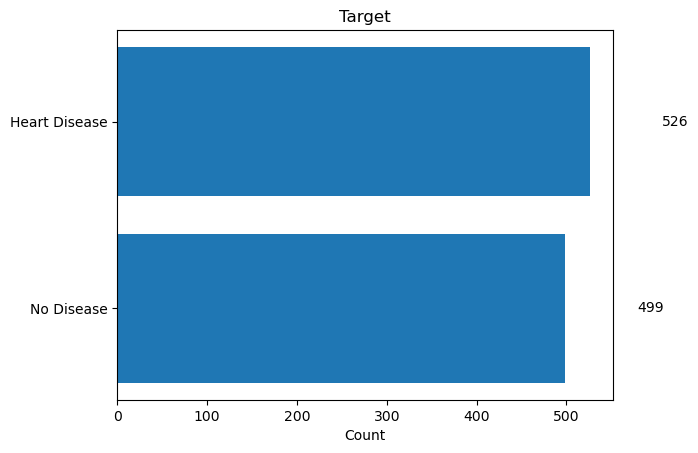

In [8]:
# Converting values to numeric 

df = df.apply(pd.to_numeric)

# Bar plot to display count of each class

disease = len(df[df['target']==1])
no_disease =len(df[df['target']==0])

plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 80, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

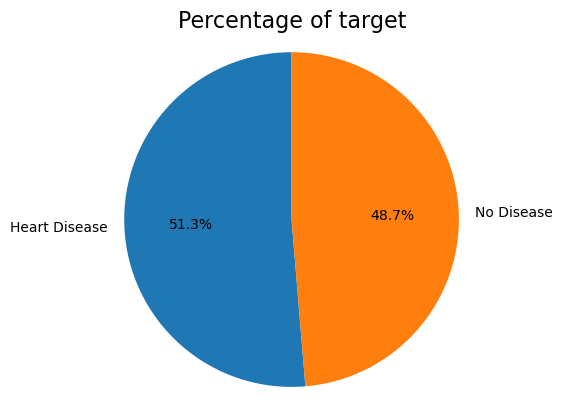

In [9]:
# Percent wise distribution of target variable

y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show()

## 2.1 Data Correlational analysis

In [10]:
# Computing standard correlation coefficients (Pearson's r) for each pair of attributes
corr_matrix = df.corr()
corr_matrix

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
Sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


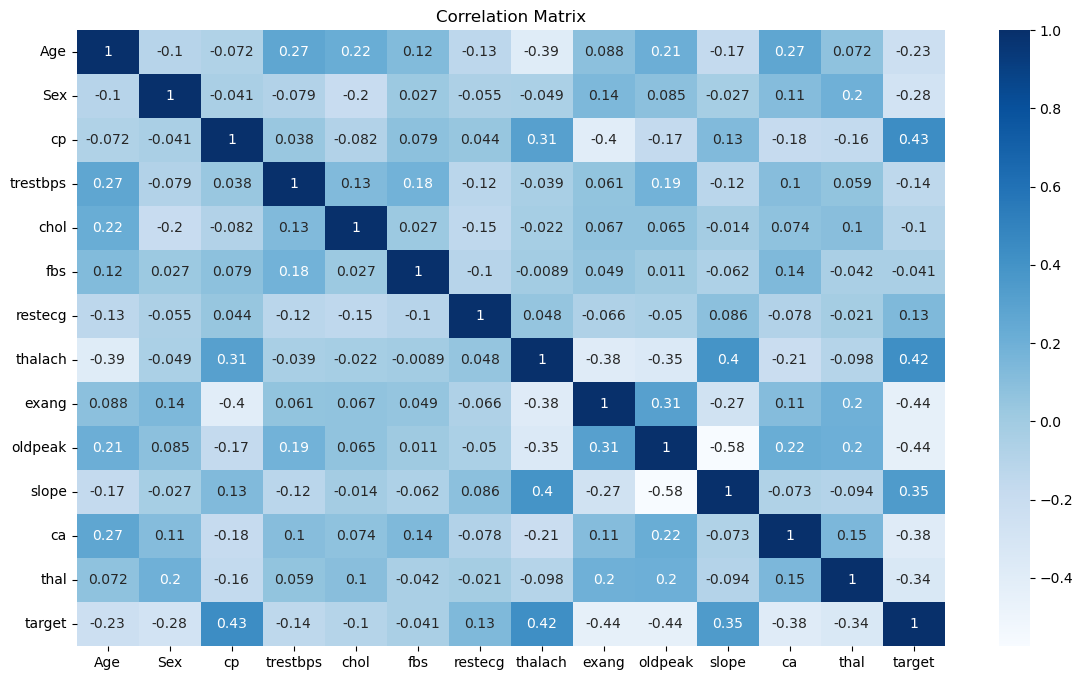

In [11]:
# The correlational analysis can have an effect on the feature selection process because it can help identify 
# which features are highly correlated with the target variable and therefore potentially more important for the model. 
# However, it is important to consider other factors as well, such as the relevance of the features to the problem at hand.
# and the complexity of the model.

# Plotting correlation heat map for our dataset

plt.figure(figsize=(14,8))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), cmap="Blues", annot=True)         
plt.show()

## Correlational Analysis:
 Insights from the above graph are:
Features( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
Other features like ("age","sex" )are negatively correlated with the target feature.
Features( “Age”,“cp”, “restecg”, “thalach”, “slope” ) need to be normalized.

# 3. Data Pre-processing and cleaning

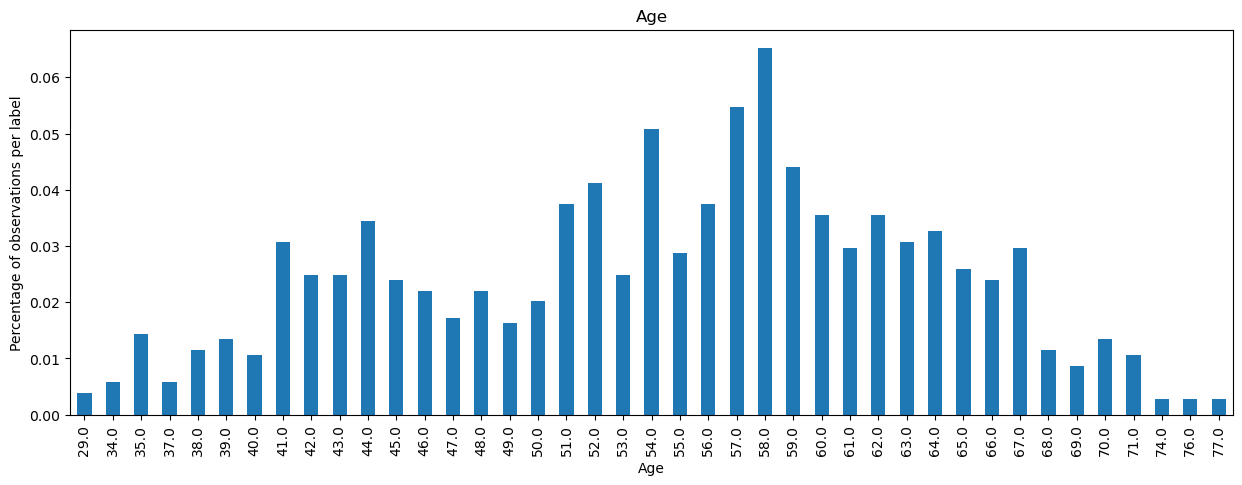

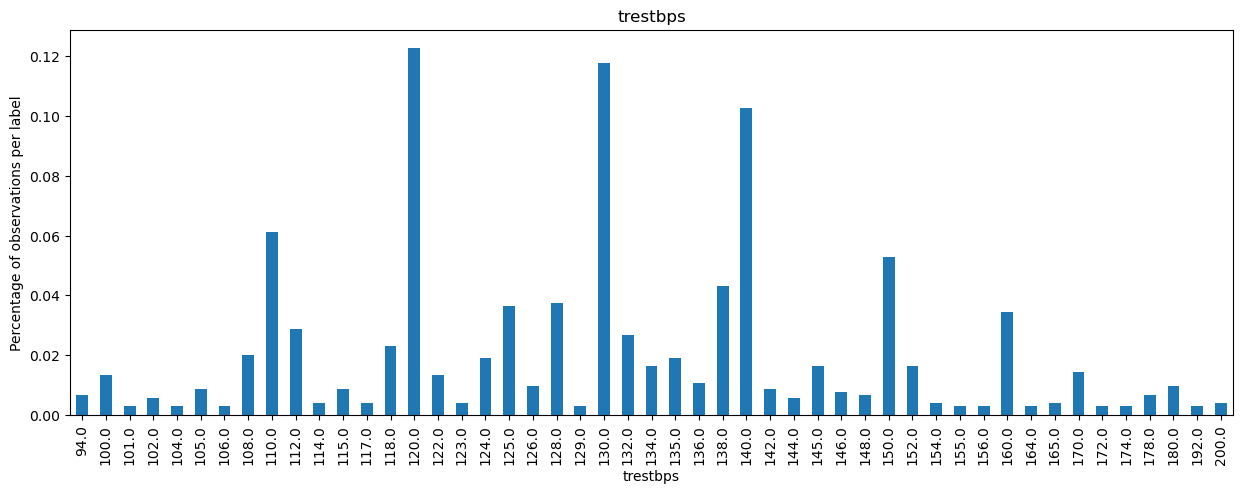

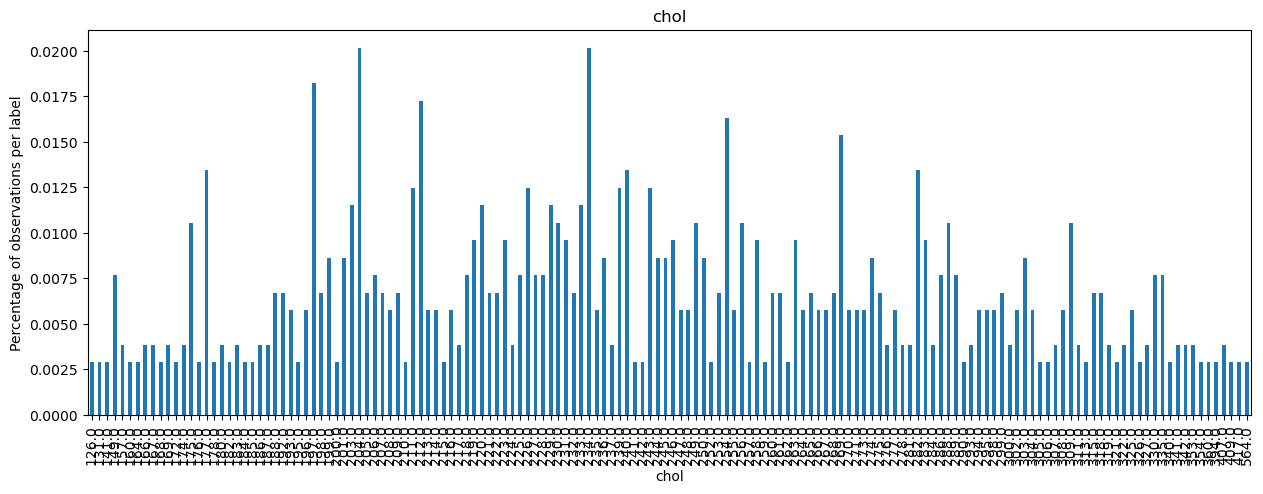

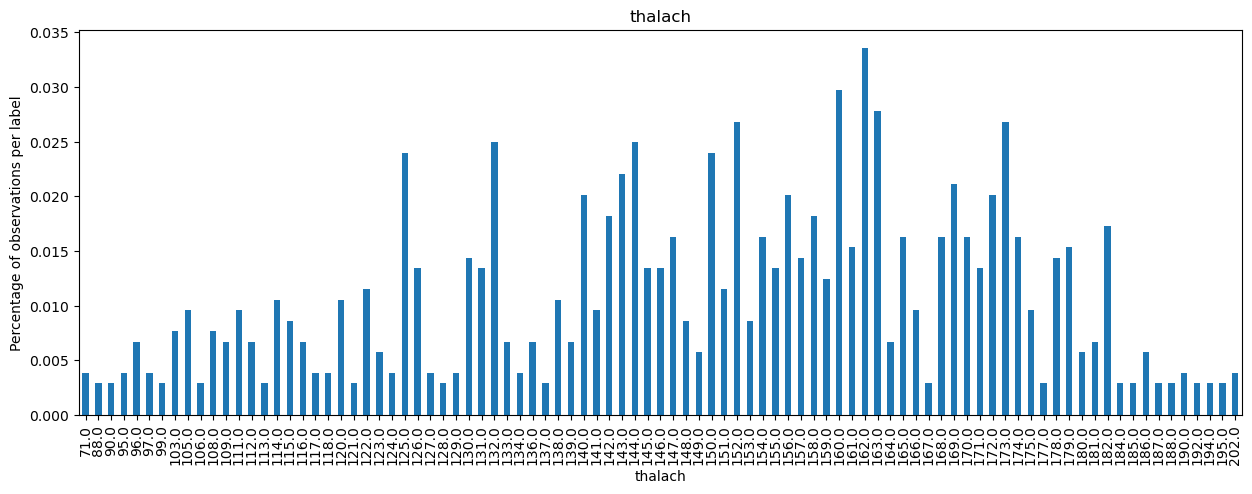

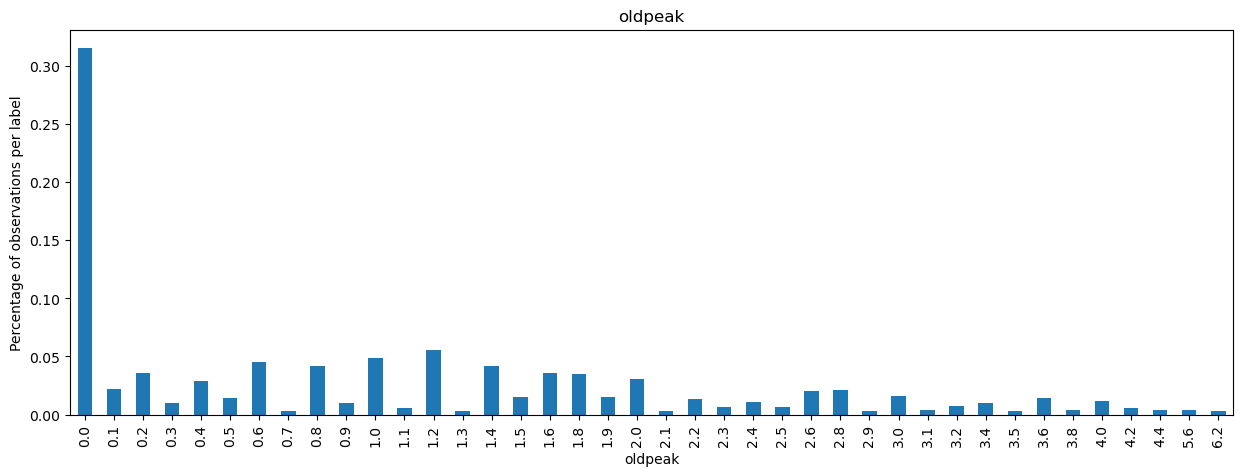

In [12]:
# To detect outliers in discrete variables, we plot Barplot for ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for var in ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    plt.figure(figsize=(15,5))
    (df.groupby(var)[var].count() / float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

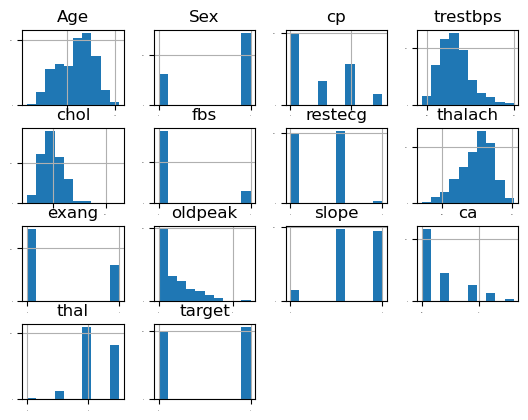

In [13]:
# To get an insight into the dataset, we can use various types of visualizations such as scatter plots, box plots, and histograms. 
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

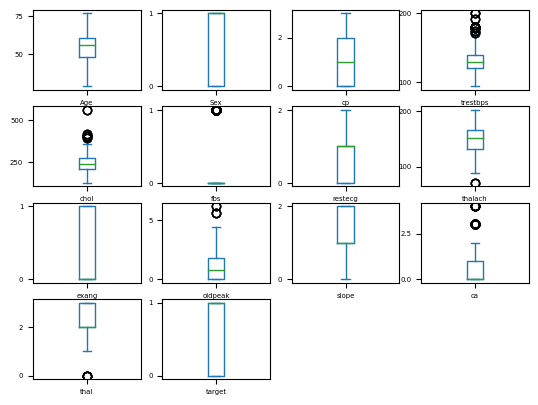

In [14]:
# Visualize Density
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=5)
plt.show()

In [15]:
# Finding the quantile using the DataFrame.quantile() Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
out = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
out

Age           0
Sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64

## Data Cleaning(Removing outliers and Checking NULL/Missing Values)¶

In [16]:
# Handling outliers: This can be done using methods such as capping or truncating extreme values,or using robust scalers to transform the data.  
# In our case we will be removing extreme values this will induce null values in the dataset so we can convert it to zero and drop those rows 
# (for our dataset using robust scalers and transformation causing overfitting to the model) 

mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
#print(mask)
df[mask] = np.nan
df = df.dropna()

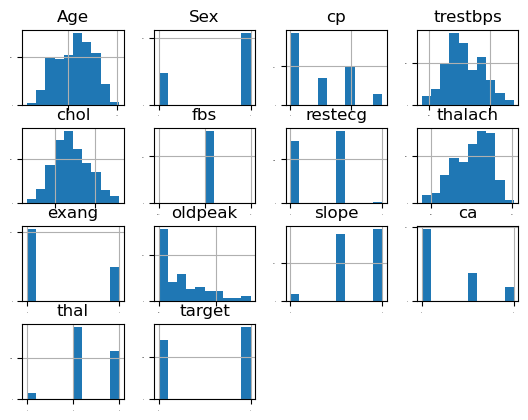

In [17]:
# Plotting histogram after removing outliers
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

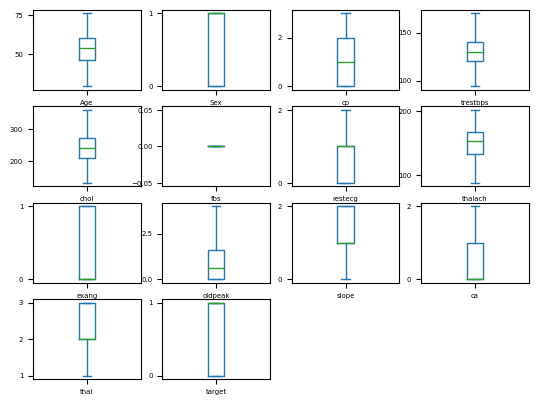

In [18]:
# Box plot after removing outliers
df.plot(kind='box', subplots=True, layout=(4,4), sharex=True, legend=True,
fontsize=5)
plt.show()

In [19]:
# Dataframe describe after removing outliers
df.describe()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.0,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,53.431730,0.691808,0.924577,128.685306,242.075423,0.0,0.551365,150.669701,0.323797,0.972432,1.438231,0.495449,2.331599,0.548765
std,9.225098,0.462047,1.019105,15.314066,44.521145,0.0,0.515667,22.567898,0.468228,1.050258,0.589973,0.705479,0.568764,0.497940
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.0,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.0,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [20]:
# Info summary confirms that there are no missing or NULL values in dataframe as all values are non-null and equal to 769.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 1 to 1043
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       769 non-null    float64
 1   Sex       769 non-null    float64
 2   cp        769 non-null    float64
 3   trestbps  769 non-null    float64
 4   chol      769 non-null    float64
 5   fbs       769 non-null    float64
 6   restecg   769 non-null    float64
 7   thalach   769 non-null    float64
 8   exang     769 non-null    float64
 9   oldpeak   769 non-null    float64
 10  slope     769 non-null    float64
 11  ca        769 non-null    float64
 12  thal      769 non-null    float64
 13  target    769 non-null    float64
dtypes: float64(14)
memory usage: 90.1 KB


In [21]:
# checking for null values - No Null values present
df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
# Applying Normalization on the data

df = pd.get_dummies(df, columns = ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
df.head(2)

,Age,trestbps,chol,thalach,oldpeak,target,Sex_0.0,Sex_1.0,cp_0.0,cp_1.0,...,exang_1.0,slope_0.0,slope_1.0,slope_2.0,ca_0.0,ca_1.0,ca_2.0,thal_1.0,thal_2.0,thal_3.0
1,-0.155300,-0.240805,-0.675971,0.768418,0.026266,0.0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1.797168,1.066034,-1.530053,-1.138183,1.550693,0.0,0,1,1,0,...,1,1,0,0,1,0,0,0,0,1


# 4. Model Building

## 4.1 Dataset splitting

In [23]:
# Next, we use the train_test_split function from sklearn to create a train and a testing subset of the ratio 80 to 20.
X = df.drop('target', axis=1)
Y = df.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print('shape of Trainig Data :', X_train.shape, Y_train.shape)
print('shape of Test Data :', X_test.shape, Y_test.shape)

shape of Trainig Data : (538, 26) (538,)
shape of Test Data : (231, 26) (231,)


## 4.2.1 KNN Machine Learning Algorithm

In [24]:
# Applying KNN classification to the dataset

print('KNeighborsClassifier')
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_pred_KNN = model.predict(X_test)
score = model.score(X_train, Y_train)

print('Training Score:', score)
score_KNN = model.score(X_test, Y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred_KNN}) # Heart-Disease yes or no? 1/0


KNeighborsClassifier
Training Score: 0.9237918215613383
Testing Score: 0.9237918215613383


# Performace Evaluation - KNN Classifier

In [25]:
# Percentage of people predicted with heart disease and classification report

people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("Percent of people predicted with heart-disease:", rate_people)

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_KNN))

Percent of people predicted with heart-disease: 0.6017316017316018
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        94
         1.0       0.87      0.88      0.88       137

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231



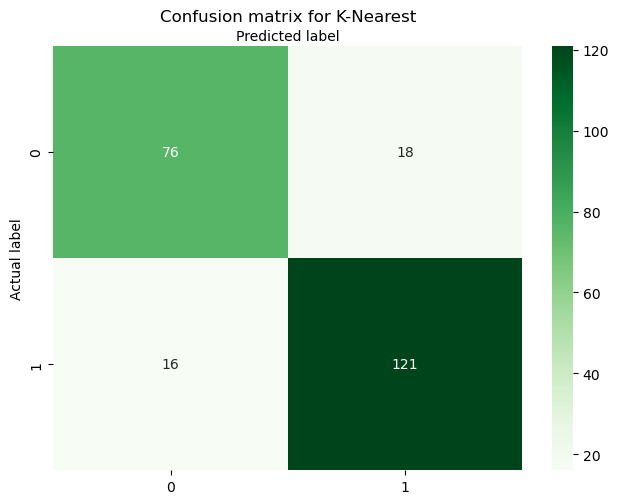

In [26]:
# Evaluationg confusion matrix to check values of True Positive,False Positive,True Negative,False Negative

confusion_matrix = confusion_matrix(Y_test,Y_pred_KNN)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for K-Nearest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

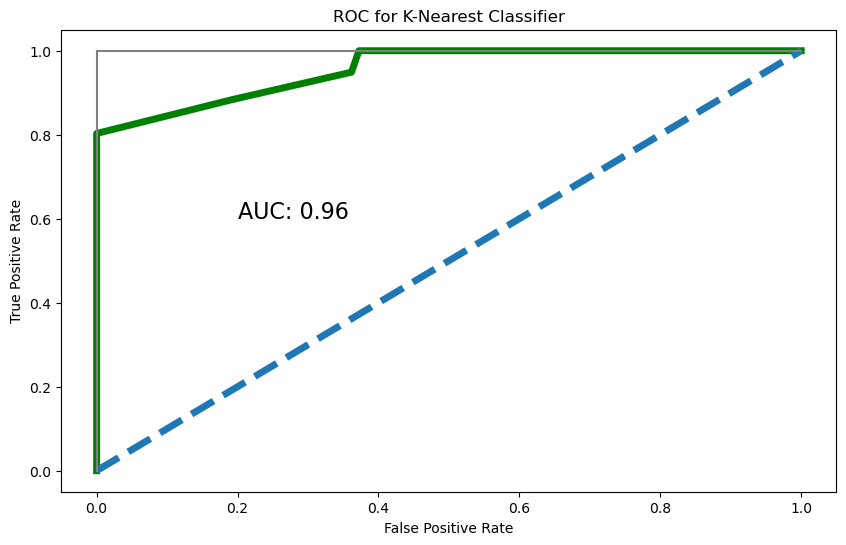

In [27]:
# ROC Curve for K-Nearest Classifier

Y_probabilities = model.predict_proba(X_test)[:,1]

false_positive_rate, true_positive_rate, threshold_knn = roc_curve(Y_test,Y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for K-Nearest Classifier')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(Y_test,Y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# 4.2.2 Random Forest Algotithm

In [28]:
# For Random Forest algorithm, We use Grid Search CV to find best hyper parameter values to train the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
print('RandomForestClassifier')
# Using grid search cv for to find the optimum hyperparameters for random forest technique
# Define the parameter grid to search
parameter_grid = {
    'n_estimators': [10, 70, 100, 150, 200],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
}
# Create a random forest classifier
random_for = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_for, param_grid=parameter_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X, Y)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score of Grid Search: ", grid_search.best_score_)

n_est = grid_search.best_params_['n_estimators']
max_dep = grid_search.best_params_['max_depth']
min_sample_leafs = grid_search.best_params_['min_samples_leaf']
min_split =grid_search.best_params_['min_samples_split']

model = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, min_samples_leaf= min_sample_leafs, min_samples_split=  min_split)
model.fit(X_train, Y_train)
Y_pred_RF = model.predict(X_test)

score = model.score(X_train, Y_train)
print('Training Score:', score)
score_RF = model.score(X_test, Y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred_RF}) # Heart-Disease yes or no? 1/0

RandomForestClassifier
Best parameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best score of Grid Search:  0.9063322298616416
Training Score: 0.9256505576208178
Testing Score: 0.9256505576208178


# Performance Evaluation for Random forest Classifier

In [29]:
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)


score_rfc = score
out_logreg = output
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_RF))

% of people predicted with heart-disease: 0.6536796536796536
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85        94
         1.0       0.87      0.96      0.91       137

    accuracy                           0.89       231
   macro avg       0.90      0.87      0.88       231
weighted avg       0.89      0.89      0.89       231



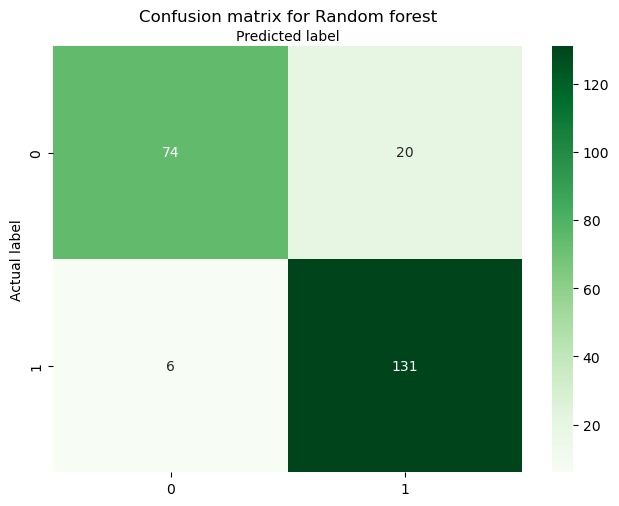

In [30]:
# Evaluationg confusion matrix to check values of True Positive,False Positive,True Negative,False Negative
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_RF)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

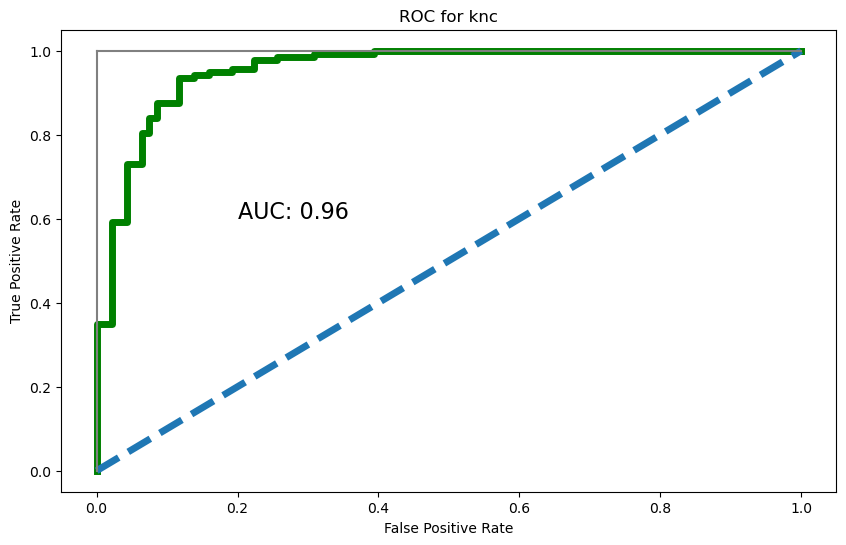

In [31]:
# ROC Curve for Random forest Classifier

Y_probabilities_RF = model.predict_proba(X_test)[:,1]
fp, tp, threshold = roc_curve(Y_test,Y_probabilities_RF)
plt.figure(figsize=(10,6))
plt.title('ROC for knc')
plt.plot(fp, tp, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(Y_test,Y_probabilities_RF)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Effectiveness analysis of Random-forest and K-Nearest Neighbors techniques

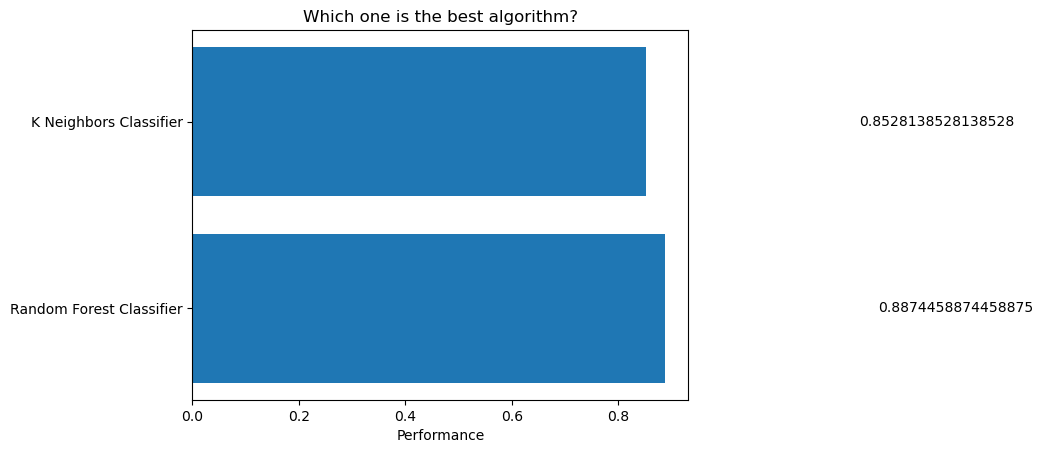

In [32]:
# Comparision of Random forest and K-Nearest Classifier
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('K Neighbors Classifier', 'Random Forest Classifier')
y_pos = np.arange(len(algorithms))
x = (score_KNN, score_RF) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 0.4, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

## Final Remarks

1. In conclusion, after evaluating the performance of two machine learning algorithms, Random Forest (RF) has shown to be the superior algorithm for detecting heart disease. 
2. RF consistently outperformed the other algorithm in terms of precision, recall, f1-score, and accuracy, with an overall accuracy of over 88%. 
3. Additionally, RF exhibited the best Area Under the Curve (AUC) compared to the other algorithm, with a value of 0.96. 
4. Therefore, for the problem of heart disease detection, it is recommended to use the RF algorithm over the other algorithm evaluated.